In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
import math

In [7]:
def K_scratch(dataframe,k,iters):
    print("k ==",k)
    #it moves the keys at the end of the rows
    ids=dataframe["track_id"].copy()
    del dataframe["track_id"]
    dataframe["track_id"]=ids
    dataframe["cluster_#"]=0

    differences=[]
    
    #it takes k rows from the dataframe excluding the string columns
    centroids=dataframe.iloc[:,:-5].sample(n=k)
    first=False
    diff=1
    steps=1
    PastDistance=0
    dataframe["cluster_#"]=0
    while diff!=0 and steps<=iters:
        distanceSum=0
        steps+=1
        #reset the column cluster_#
        #it iterates on each row(point)
        for i in range(len(dataframe)):
            #it keeps the distance of each node to the k clusters
            support=np.zeros(k)
            #it iterates on each centroids
            for j in range(len(centroids)):
                #it fills with all the distances
                r=np.asarray(dataframe.iloc[i,:-5])
                c=np.asarray(centroids.iloc[j,:])
                dist = np.linalg.norm(r-c)
                support[j]=dist
            #it associates the  i point to the cluster that minimize the distance that corrisponds to the index of support
            index=np.argmin(support)
            #it measure the total distance from each point to the centroid that is the nearest
            distanceSum+=support[index]
            dataframe.loc[i,"cluster_#"]=index
            #new centroids
        differences.append(distanceSum)   
        new_centroids=dataframe.groupby(["cluster_#"],group_keys=False).mean().iloc[:,:-1]
        if first:
            v=new_centroids-centroids
            diff=np.sum(np.sum(v,axis=1))
            #diff=distanceSum-PastDistance
            PastDistance=distanceSum
            centroids=new_centroids.copy()
        else:
            diff=1
            PastDistance=distanceSum
            centroids=new_centroids.copy()
            first=True
    vect=np.asarray(differences)
    return vect

In [8]:
dataset=pd.read_csv("final_dataset.csv")
dataset2=dataset.copy()
dataset2.shape

(13129, 60)

k == 11


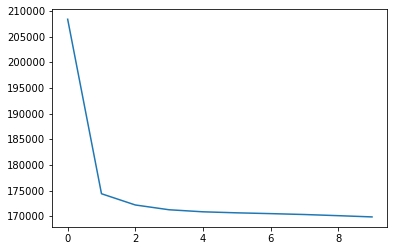

Wall time: 6min 21s


In [9]:
%%time
vect=K_scratch(dataset,11,10)
plt.plot(vect)
plt.show()

In [11]:
dataset.shape

(13129, 61)

In [12]:
dataset.to_csv("cluster_dataset.csv",index=False)

In [156]:
def printPivotTable(var):
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    if var == "bit":
        df["Variables"] = ["< 80","< 130","< 180", "> 180", ""]
        for name in col[1:]:
            n_cluster = int(name.split("#")[1])
            l = [0,0,0,0,0]
            list_track = track[dataset["cluster_#"] == n_cluster-1]
            
            for x in list_track.audio_features_tempo:
                if x < 80:
                    l[0] += 1
                elif 80 < x < 130:
                    l[1] += 1
                elif 130 < x < 180:
                    l[2] += 1
                elif 180 < x:
                    l[3] += 1
                
            l = [round(100*x/len(list_track.audio_features_tempo),2) for x in l]
            s = sum(l)
            l[4] = s
            l = ['{:.2f}'.format(x)+"%" for x in l]
            df[name] = l 
            
    return df 

In [13]:
dataset=pd.read_csv("cluster_dataset.csv")
dataset.head()

,0_e,1_e,2_e,3_e,4_e,0_f,1_f,2_f,3_f,4_f,5_f,6_f,7_f,8_f,9_f,10_f,11_f,12_f,13_f,14_f,15_f,16_f,17_f,18_f,19_f,20_f,21_f,22_f,23_f,24_f,25_f,26_f,27_f,28_f,29_f,30_f,31_f,32_f,33_f,34_f,35_f,36_f,37_f,38_f,39_f,40_f,41_f,42_f,43_f,44_f,45_f,46_f,47_f,48_f,0_t,1_t,track_genres,track_genres_all,track_genre_top,track_id,cluster_#
0,1.735493,0.620828,0.694250,0.429913,-0.799491,2.060060,-3.089425,-5.565897,0.080540,2.309259,-3.597815,-5.054186,-0.889460,-5.108289,-4.067422,3.572921,-1.159984,-2.207837,-1.590577,0.223468,0.433005,-1.436552,1.154619,-0.077386,1.605491,-1.225725,-0.316249,0.250171,-2.847016,0.360653,-3.041283,0.892071,1.449692,-0.321161,0.564564,1.440013,-0.743917,-0.548343,-0.478786,-0.800450,0.595387,1.367687,-0.865030,-0.115468,0.701889,-2.255720,0.352273,-1.812983,-0.385805,-1.353170,-0.144009,-0.795258,1.588611,0.892261,-0.178172,-0.330308,[21],[21],Hip-Hop,2,4
1,1.411328,1.082296,1.554131,-0.379830,-2.105341,3.509229,-5.384901,-4.332552,-1.113455,-3.068285,2.204026,-0.234568,4.726556,-0.604038,-3.417886,2.969556,0.127853,-0.722156,0.904160,-1.056872,-2.531495,-0.230248,0.510510,-2.259653,0.534650,-0.161707,-1.717520,1.427575,-3.051037,0.573442,-2.698406,-0.714678,1.074096,-0.859664,2.312495,-0.855569,0.707543,0.354506,-1.060267,1.844360,-1.362437,2.580927,-1.632463,1.159813,0.914112,-1.623615,1.195633,-0.955472,0.405990,-0.122112,0.697009,-0.585094,2.636835,-0.177605,-0.018475,-0.170611,[21],[21],Hip-Hop,3,5
2,2.034419,0.901675,0.865997,-1.598672,0.510788,0.954588,-3.178007,-3.494701,-0.934796,-1.098683,0.455748,-2.390555,1.266910,0.984996,-1.733512,2.806501,-2.365269,-0.655929,0.470486,0.112722,-0.440212,-1.329592,0.536810,0.613813,2.531010,0.213037,-0.983671,-0.159937,-2.368901,-3.419323,-1.974337,2.764425,1.807653,-1.772850,-0.106142,2.107326,0.077253,-0.829433,-0.471845,2.604778,0.328108,0.566731,-1.895724,1.725595,1.045798,-0.848433,0.523567,-0.615558,0.542988,-1.050340,0.036632,-1.478031,1.834802,-0.275640,-0.090223,-0.242359,[21],[21],Hip-Hop,5,0
3,1.088343,0.161475,-1.304938,0.958388,1.566446,6.695399,1.329777,-5.129129,-0.915308,-2.155906,-0.120454,0.072621,3.904935,0.213867,-2.841634,1.364947,1.260867,0.323505,2.791088,2.677133,-1.369205,-0.696569,0.325818,-0.943319,1.015012,-2.506278,-2.761315,0.190590,0.912295,-1.293202,0.417753,-0.336509,-2.035355,3.588996,-1.083363,2.753521,1.246869,0.050735,1.078595,2.261790,0.200076,1.084177,0.234083,2.954890,0.206753,-0.037722,-0.153327,0.113327,0.843542,-0.054427,-0.498014,-0.674813,-1.253856,-0.908244,0.474845,-1.015727,[10],[10],Pop,10,3
4,1.947887,2.376847,1.268757,0.433682,-1.265199,0.704719,-6.843188,-2.639574,-1.228858,-2.560928,-1.636973,-2.552980,2.467552,1.896833,1.234638,1.487258,0.202797,0.010909,0.817357,1.636226,0.297142,-1.574151,1.654055,1.132101,1.360217,0.644275,1.097713,-0.243594,-1.532462,0.214592,-1.979646,-0.354334,1.413047,-1.067750,-0.056374,0.213670,-0.074266,2.079699,-1.740871,0.696890,-0.267314,0.665867,-0.227684,0.680915,0.181871,-0.314564,0.499727,-0.372851,-0.767929,-0.396553,0.394476,-0.798892,0.690110,-1.932102,-0.087908,-0.240045,[21],[21],Hip-Hop,134,4


In [76]:
dataset=pd.read_csv("cluster_dataset.csv")

diz ={}
df=dataset[["track_id","cluster_#"]]
for index in range (13128) :
    row=df.iloc[index,:]
    track_id=row[0]
    cluster_id=row[1]
    if cluster_id not in diz:
        diz[cluster_id]=[track_id]
    else:
        diz[cluster_id].append(track_id)

with open('data/dictionary_myKmean.pkl','wb') as f:
        pickle.dump(diz,f)

NameError: name 'pickle' is not defined

In [21]:
import functions as f

f.printPivotTableBit(diz)

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,bit < 80,6.13%,13.28%,24.39%,4.53%,5.24%,6.35%,5.19%,13.99%,9.11%,4.51%,16.18%
1,80 < bit < 130,54.26%,56.33%,53.08%,47.26%,57.30%,56.59%,45.52%,56.35%,54.39%,46.88%,55.70%
2,130 < bit < 180,34.39%,26.04%,18.51%,40.31%,29.64%,31.29%,37.46%,26.11%,27.32%,43.17%,21.69%
3,bit > 180,5.23%,4.36%,4.02%,7.90%,7.83%,5.76%,11.82%,3.56%,9.19%,5.44%,6.43%
4,,100.01%,100.01%,100.00%,100.00%,100.01%,99.99%,99.99%,100.01%,100.01%,100.00%,100.00%


In [23]:
features=pd.read_csv("data/features.csv")
for col in features:
    if col!="track_id":
        mean=features[col].mean()
        std=features[col].std()
        features[col]=(features[col]- mean)/std

f=features.loc[:, features.columns != 'track_id']

pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(f)
x=pca.transform(f)

f=pd.DataFrame(x)
f= f.add_suffix("_features")
f["track_id"]=features["track_id"]
f.head()

,0_features,1_features,2_features,3_features,4_features,5_features,6_features,7_features,8_features,9_features,10_features,11_features,12_features,13_features,14_features,15_features,16_features,17_features,18_features,19_features,20_features,21_features,22_features,23_features,24_features,25_features,26_features,27_features,28_features,29_features,30_features,31_features,32_features,33_features,34_features,35_features,36_features,37_features,38_features,39_features,40_features,41_features,42_features,43_features,44_features,45_features,46_features,47_features,48_features,track_id
0,2.060060,-3.089425,-5.565897,0.080540,2.309259,-3.597815,-5.054186,-0.889460,-5.108289,-4.067422,3.572921,-1.159984,-2.207837,-1.590577,0.223468,0.433005,-1.436552,1.154619,-0.077386,1.605491,-1.225725,-0.316249,0.250171,-2.847016,0.360653,-3.041283,0.892071,1.449692,-0.321161,0.564564,1.440013,-0.743917,-0.548343,-0.478786,-0.800450,0.595387,1.367687,-0.865030,-0.115468,0.701889,-2.255720,0.352273,-1.812983,-0.385805,-1.353170,-0.144009,-0.795258,1.588611,0.892261,2
1,3.509229,-5.384901,-4.332552,-1.113455,-3.068285,2.204026,-0.234568,4.726556,-0.604038,-3.417886,2.969556,0.127853,-0.722156,0.904160,-1.056872,-2.531495,-0.230248,0.510510,-2.259653,0.534650,-0.161707,-1.717520,1.427575,-3.051037,0.573442,-2.698406,-0.714678,1.074096,-0.859664,2.312495,-0.855569,0.707543,0.354506,-1.060267,1.844360,-1.362437,2.580927,-1.632463,1.159813,0.914112,-1.623615,1.195633,-0.955472,0.405990,-0.122112,0.697009,-0.585094,2.636835,-0.177605,3
2,0.954588,-3.178007,-3.494701,-0.934796,-1.098683,0.455748,-2.390555,1.266910,0.984996,-1.733512,2.806501,-2.365269,-0.655929,0.470486,0.112722,-0.440212,-1.329592,0.536810,0.613813,2.531010,0.213037,-0.983671,-0.159937,-2.368901,-3.419323,-1.974337,2.764425,1.807653,-1.772850,-0.106142,2.107326,0.077253,-0.829433,-0.471845,2.604778,0.328108,0.566731,-1.895724,1.725595,1.045798,-0.848433,0.523567,-0.615558,0.542988,-1.050340,0.036632,-1.478031,1.834802,-0.275640,5
3,6.695399,1.329777,-5.129129,-0.915308,-2.155906,-0.120454,0.072621,3.904935,0.213867,-2.841634,1.364947,1.260867,0.323505,2.791088,2.677133,-1.369205,-0.696569,0.325818,-0.943319,1.015012,-2.506278,-2.761315,0.190590,0.912295,-1.293202,0.417753,-0.336509,-2.035355,3.588996,-1.083363,2.753521,1.246869,0.050735,1.078595,2.261790,0.200076,1.084177,0.234083,2.954890,0.206753,-0.037722,-0.153327,0.113327,0.843542,-0.054427,-0.498014,-0.674813,-1.253856,-0.908244,10
4,0.870796,-1.123608,2.985161,-0.830487,-2.443368,4.542666,-0.159430,-1.837109,1.026201,-2.033911,-0.940291,-2.119107,1.312819,5.708004,-0.101214,0.445859,1.724458,-0.290226,0.503630,-1.364630,1.843650,1.081817,1.090732,0.447306,1.157095,1.097125,-1.372940,1.356526,1.129796,0.238176,-1.081955,-1.342897,0.115790,-1.200916,0.533753,-1.740970,0.746124,-2.422139,-1.195527,1.322813,0.255862,2.031229,-0.617358,-1.745584,-0.134673,-0.460641,-0.503799,-0.530338,-0.390838,20


In [28]:
tracks=pd.read_csv("data/tracks.csv")
t=tracks.copy()
cols=["track_bit_rate","track_duration","track_listens", 
      "track_interest", "track_favorites", "track_duration",
      "track_bit_rate", "album_tracks",                     
      "album_listens", "artist_favorites"]
t=t[cols]

for col in cols:
    mean=t[col].mean()
    std=t[col].std()
    t[col]=(t[col]- mean)/std
t.head()

Y_new = pca.fit_transform(t)
y=pca.transform(t)

t=pd.DataFrame(x)
t= t.add_suffix("_t")
t["track_id"]=tracks["track_id"]
t["track_genres"]=tracks["track_genres"]
t["track_genres_all"]=tracks["track_genres_all"]
t["track_genre_top"]=tracks["track_genre_top"]

In [33]:
t.shape

(106574, 53)

In [34]:
f.shape

(106574, 50)

In [35]:
final_df = f.merge(t, on = ["track_id"])
final_df.head()

,0_features,1_features,2_features,3_features,4_features,5_features,6_features,7_features,8_features,9_features,10_features,11_features,12_features,13_features,14_features,15_features,16_features,17_features,18_features,19_features,20_features,21_features,22_features,23_features,24_features,25_features,26_features,27_features,28_features,29_features,30_features,31_features,32_features,33_features,34_features,35_features,36_features,37_features,38_features,39_features,40_features,41_features,42_features,43_features,44_features,45_features,46_features,47_features,48_features,track_id,0_t,1_t,2_t,3_t,4_t,5_t,6_t,7_t,8_t,9_t,10_t,11_t,12_t,13_t,14_t,15_t,16_t,17_t,18_t,19_t,20_t,21_t,22_t,23_t,24_t,25_t,26_t,27_t,28_t,29_t,30_t,31_t,32_t,33_t,34_t,35_t,36_t,37_t,38_t,39_t,40_t,41_t,42_t,43_t,44_t,45_t,46_t,47_t,48_t,track_genres,track_genres_all,track_genre_top
0,2.060060,-3.089425,-5.565897,0.080540,2.309259,-3.597815,-5.054186,-0.889460,-5.108289,-4.067422,3.572921,-1.159984,-2.207837,-1.590577,0.223468,0.433005,-1.436552,1.154619,-0.077386,1.605491,-1.225725,-0.316249,0.250171,-2.847016,0.360653,-3.041283,0.892071,1.449692,-0.321161,0.564564,1.440013,-0.743917,-0.548343,-0.478786,-0.800450,0.595387,1.367687,-0.865030,-0.115468,0.701889,-2.255720,0.352273,-1.812983,-0.385805,-1.353170,-0.144009,-0.795258,1.588611,0.892261,2,2.060060,-3.089425,-5.565897,0.080540,2.309259,-3.597815,-5.054186,-0.889460,-5.108289,-4.067422,3.572921,-1.159984,-2.207837,-1.590577,0.223468,0.433005,-1.436552,1.154619,-0.077386,1.605491,-1.225725,-0.316249,0.250171,-2.847016,0.360653,-3.041283,0.892071,1.449692,-0.321161,0.564564,1.440013,-0.743917,-0.548343,-0.478786,-0.800450,0.595387,1.367687,-0.865030,-0.115468,0.701889,-2.255720,0.352273,-1.812983,-0.385805,-1.353170,-0.144009,-0.795258,1.588611,0.892261,[21],[21],Hip-Hop
1,3.509229,-5.384901,-4.332552,-1.113455,-3.068285,2.204026,-0.234568,4.726556,-0.604038,-3.417886,2.969556,0.127853,-0.722156,0.904160,-1.056872,-2.531495,-0.230248,0.510510,-2.259653,0.534650,-0.161707,-1.717520,1.427575,-3.051037,0.573442,-2.698406,-0.714678,1.074096,-0.859664,2.312495,-0.855569,0.707543,0.354506,-1.060267,1.844360,-1.362437,2.580927,-1.632463,1.159813,0.914112,-1.623615,1.195633,-0.955472,0.405990,-0.122112,0.697009,-0.585094,2.636835,-0.177605,3,3.509229,-5.384901,-4.332552,-1.113455,-3.068285,2.204026,-0.234568,4.726556,-0.604038,-3.417886,2.969556,0.127853,-0.722156,0.904160,-1.056872,-2.531495,-0.230248,0.510510,-2.259653,0.534650,-0.161707,-1.717520,1.427575,-3.051037,0.573442,-2.698406,-0.714678,1.074096,-0.859664,2.312495,-0.855569,0.707543,0.354506,-1.060267,1.844360,-1.362437,2.580927,-1.632463,1.159813,0.914112,-1.623615,1.195633,-0.955472,0.405990,-0.122112,0.697009,-0.585094,2.636835,-0.177605,[21],[21],Hip-Hop
2,0.954588,-3.178007,-3.494701,-0.934796,-1.098683,0.455748,-2.390555,1.266910,0.984996,-1.733512,2.806501,-2.365269,-0.655929,0.470486,0.112722,-0.440212,-1.329592,0.536810,0.613813,2.531010,0.213037,-0.983671,-0.159937,-2.368901,-3.419323,-1.974337,2.764425,1.807653,-1.772850,-0.106142,2.107326,0.077253,-0.829433,-0.471845,2.604778,0.328108,0.566731,-1.895724,1.725595,1.045798,-0.848433,0.523567,-0.615558,0.542988,-1.050340,0.036632,-1.478031,1.834802,-0.275640,5,0.954588,-3.178007,-3.494701,-0.934796,-1.098683,0.455748,-2.390555,1.266910,0.984996,-1.733512,2.806501,-2.365269,-0.655929,0.470486,0.112722,-0.440212,-1.329592,0.536810,0.613813,2.531010,0.213037,-0.983671,-0.159937,-2.368901,-3.419323,-1.974337,2.764425,1.807653,-1.772850,-0.106142,2.107326,0.077253,-0.829433,-0.471845,2.604778,0.328108,0.566731,-1.895724,1.725595,1.045798,-0.848433,0.523567,-0.615558,0.542988,-1.050340,0.036632,-1.478031,1.834802,-0.275640,[21],[21],Hip-Hop
3,6.695399,1.329777,-5.129129,-0.915308,-2.155906,-0.120454,0.072621,3.904935,0.213867,-2.841634,1.364947,1.260867,0.323505,2.791088,2.677133,-1.369205,-0.696569,0.325818,-0.943319,1.015012,-2.506278,-2.761315,0.190590,0.912295,-1.293202,0.417753,-0.336509,

In [27]:
t.head()

,track_bit_rate,track_duration,track_listens,track_interest,track_favorites,track_duration,track_bit_rate,album_tracks,set_split,set_subset,album_listens,artist_favorites
0,-0.107577,-0.359550,-0.129091,0.058614,-0.087505,-0.359550,-0.107577,-0.318485,training,small,6073,9
1,-0.107577,-0.133704,-0.226126,-0.108916,-0.161503,-0.133704,-0.107577,-0.318485,training,medium,6073,9
2,-0.107577,-0.235171,-0.146779,-0.084570,0.208489,-0.235171,-0.107577,-0.318485,training,small,6073,9
3,-1.053994,-0.382462,5.954811,2.699612,12.936200,-0.382462,-1.053994,-0.443661,training,small,47632,74
4,-0.107577,0.108507,-0.245184,-0.134787,-0.235501,0.108507,-0.107577,-0.168273,training,large,2710,10


In [41]:
final_df.to_csv("final_dataset_k++.csv",index=False)
final_df.shape

(106574, 103)

In [50]:
final_df = pd.read_csv("final_dataset_k++.csv")
final_df.head()

,0_features,1_features,2_features,3_features,4_features,5_features,6_features,7_features,8_features,9_features,10_features,11_features,12_features,13_features,14_features,15_features,16_features,17_features,18_features,19_features,20_features,21_features,22_features,23_features,24_features,25_features,26_features,27_features,28_features,29_features,30_features,31_features,32_features,33_features,34_features,35_features,36_features,37_features,38_features,39_features,40_features,41_features,42_features,43_features,44_features,45_features,46_features,47_features,48_features,0_t,1_t,2_t,3_t,4_t,5_t,6_t,7_t,8_t,9_t,10_t,11_t,12_t,13_t,14_t,15_t,16_t,17_t,18_t,19_t,20_t,21_t,22_t,23_t,24_t,25_t,26_t,27_t,28_t,29_t,30_t,31_t,32_t,33_t,34_t,35_t,36_t,37_t,38_t,39_t,40_t,41_t,42_t,43_t,44_t,45_t,46_t,47_t,48_t,track_genres,track_genres_all,track_genre_top,cluster_#,track_id
0,2.060060,-3.089425,-5.565897,0.080540,2.309259,-3.597815,-5.054186,-0.889460,-5.108289,-4.067422,3.572921,-1.159984,-2.207837,-1.590577,0.223468,0.433005,-1.436552,1.154619,-0.077386,1.605491,-1.225725,-0.316249,0.250171,-2.847016,0.360653,-3.041283,0.892071,1.449692,-0.321161,0.564564,1.440013,-0.743917,-0.548343,-0.478786,-0.800450,0.595387,1.367687,-0.865030,-0.115468,0.701889,-2.255720,0.352273,-1.812983,-0.385805,-1.353170,-0.144009,-0.795258,1.588611,0.892261,2.060060,-3.089425,-5.565897,0.080540,2.309259,-3.597815,-5.054186,-0.889460,-5.108289,-4.067422,3.572921,-1.159984,-2.207837,-1.590577,0.223468,0.433005,-1.436552,1.154619,-0.077386,1.605491,-1.225725,-0.316249,0.250171,-2.847016,0.360653,-3.041283,0.892071,1.449692,-0.321161,0.564564,1.440013,-0.743917,-0.548343,-0.478786,-0.800450,0.595387,1.367687,-0.865030,-0.115468,0.701889,-2.255720,0.352273,-1.812983,-0.385805,-1.353170,-0.144009,-0.795258,1.588611,0.892261,[21],[21],Hip-Hop,0,2
1,3.509229,-5.384901,-4.332552,-1.113455,-3.068285,2.204026,-0.234568,4.726556,-0.604038,-3.417886,2.969556,0.127853,-0.722156,0.904160,-1.056872,-2.531495,-0.230248,0.510510,-2.259653,0.534650,-0.161707,-1.717520,1.427575,-3.051037,0.573442,-2.698406,-0.714678,1.074096,-0.859664,2.312495,-0.855569,0.707543,0.354506,-1.060267,1.844360,-1.362437,2.580927,-1.632463,1.159813,0.914112,-1.623615,1.195633,-0.955472,0.405990,-0.122112,0.697009,-0.585094,2.636835,-0.177605,3.509229,-5.384901,-4.332552,-1.113455,-3.068285,2.204026,-0.234568,4.726556,-0.604038,-3.417886,2.969556,0.127853,-0.722156,0.904160,-1.056872,-2.531495,-0.230248,0.510510,-2.259653,0.534650,-0.161707,-1.717520,1.427575,-3.051037,0.573442,-2.698406,-0.714678,1.074096,-0.859664,2.312495,-0.855569,0.707543,0.354506,-1.060267,1.844360,-1.362437,2.580927,-1.632463,1.159813,0.914112,-1.623615,1.195633,-0.955472,0.405990,-0.122112,0.697009,-0.585094,2.636835,-0.177605,[21],[21],Hip-Hop,0,3
2,0.954588,-3.178007,-3.494701,-0.934796,-1.098683,0.455748,-2.390555,1.266910,0.984996,-1.733512,2.806501,-2.365269,-0.655929,0.470486,0.112722,-0.440212,-1.329592,0.536810,0.613813,2.531010,0.213037,-0.983671,-0.159937,-2.368901,-3.419323,-1.974337,2.764425,1.807653,-1.772850,-0.106142,2.107326,0.077253,-0.829433,-0.471845,2.604778,0.328108,0.566731,-1.895724,1.725595,1.045798,-0.848433,0.523567,-0.615558,0.542988,-1.050340,0.036632,-1.478031,1.834802,-0.275640,0.954588,-3.178007,-3.494701,-0.934796,-1.098683,0.455748,-2.390555,1.266910,0.984996,-1.733512,2.806501,-2.365269,-0.655929,0.470486,0.112722,-0.440212,-1.329592,0.536810,0.613813,2.531010,0.213037,-0.983671,-0.159937,-2.368901,-3.419323,-1.974337,2.764425,1.807653,-1.772850,-0.106142,2.107326,0.077253,-0.829433,-0.471845,2.604778,0.328108,0.566731,-1.895724,1.725595,1.045798,-0.848433,0.523567,-0.615558,0.542988,-1.050340,0.036632,-1.478031,1.834802,-0.275640,[21],[21],Hip-Hop,0,5
3,6.695399,1.329777,-5.129129,-0.915308,-2.155906,-0.120454,0.072621,3.904935,0.213867,-2.841634,1.364947,1.260867,0.323505,2.791088,2.677133,-1.369205,-0.696569,0.325818,-0.943319,1.015012,-2.506278,-2.761315,0.190590,0.912295,-1.293202,0.4

In [44]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    K_scratch(final_df,k,10)
    labels = np.asarray(final_df["cluster_#"])
    sil.append(silhouette_score(X=final_df.iloc[:,:-5],labels=labels, metric='euclidean'))

k == 2


KeyboardInterrupt: 

In [ ]:
!pip3 install yellowbrick

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics    
import time

silhouette_scores = {}
distortions = {}

for k in range(2,20):
    start_time = time.time()
    model_kmeans_k = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    model_kmeans_k.fit(final_df.iloc[:,:-5])
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(final_df.iloc[:,:-5], labels_k)
    silhouette_scores[k] = score_k
    distortions[k] = model_kmeans_k.inertia_
    print("k = %d\tSS: %5.4f\t distortion: %5.4f\t time: %.3s seconds" % (k, score_k, model_kmeans_k.inertia_,(time.time() - start_time)))
print("Done!")

k = 2	SS: 0.1110	 distortion: 69743890.2842	 time: 117 seconds
k = 3	SS: 0.0773	 distortion: 66048451.2355	 time: 115 seconds
k = 4	SS: 0.0773	 distortion: 63292611.6024	 time: 118 seconds
k = 5	SS: 0.0660	 distortion: 61350119.0319	 time: 119 seconds
k = 6	SS: 0.0519	 distortion: 61229862.4024	 time: 116 seconds
k = 7	SS: 0.0526	 distortion: 58475980.6939	 time: 119 seconds
k = 8	SS: 0.0452	 distortion: 57462461.0528	 time: 118 seconds
k = 9	SS: 0.0460	 distortion: 55848920.8948	 time: 117 seconds
k = 10	SS: 0.0482	 distortion: 54780099.8345	 time: 119 seconds
k = 11	SS: 0.0398	 distortion: 54141882.4939	 time: 118 seconds
k = 12	SS: 0.0388	 distortion: 53189468.5406	 time: 120 seconds
k = 13	SS: 0.0347	 distortion: 52925344.5600	 time: 119 seconds
k = 14	SS: 0.0322	 distortion: 52319033.2770	 time: 118 seconds
k = 15	SS: 0.0359	 distortion: 51421605.3243	 time: 118 seconds
k = 16	SS: 0.0363	 distortion: 50675434.0888	 time: 117 seconds
k = 17	SS: 0.0358	 distortion: 50502517.7806	 ti

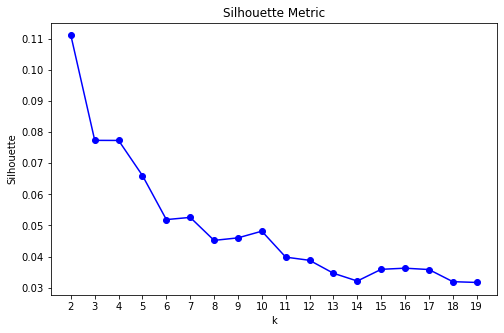

In [71]:
plt.figure(figsize = (8,5))
plt.plot(silhouette_scores.values(), 'bo-')
plt.xticks(range(0,18), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
#plt.axvline(1, color = "r")
plt.show()

In [ ]:
!pip3 install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

score=[]
dispertion=[]
for i in range(2,20):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit_predict(final_df.iloc[:,:-5])
    score.append(silhouette_score(final_df.iloc[:,:-5], km.labels_, metric='euclidean'))
    dispertion.append(km.inertia_)

plt.plot(dispertion,'b-o')

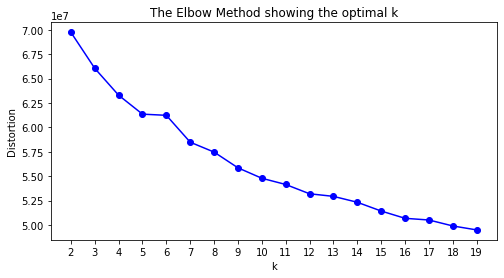

In [72]:
plt.figure(figsize=(8,4))
plt.plot(distortions.values(), 'bo-')
plt.xticks(range(0,18), silhouette_scores.keys())
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
kmeans_model = KMeans(n_clusters = 14)
kmeans_model.fit(final_df.iloc[:,:-5])

final_df["cluster_#"] = kmeans_model.labels_

In [80]:
import pickle

dizz ={}
df=final_df[["track_id","cluster_#"]]
for index in range (len(final_df)) :
    row=df.iloc[index,:]
    track_id=row[0]
    cluster_id=row[1]
    if cluster_id not in dizz:
        dizz[cluster_id]=[track_id]
    else:
        dizz[cluster_id].append(track_id)
        
with open('data/dictionary_k++.pkl','wb') as f:
        pickle.dump(dizz,f)

In [99]:
import myFunctions as f

f.printPivotTableDuration(dizz)

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11,Cluster #12,Cluster #13,Cluster #14
0,0-120s,62.12%,18.87%,14.91%,19.40%,40.00%,10.95%,14.26%,13.37%,44.16%,17.46%,25.49%,0.00%,11.51%,8.07%
1,120-480s,31.16%,75.69%,76.40%,62.34%,40.00%,78.96%,76.90%,76.13%,51.48%,74.99%,66.69%,100.00%,81.72%,76.37%
2,480-720s,3.67%,3.54%,5.01%,9.94%,20.00%,6.19%,5.58%,5.32%,2.88%,4.59%,4.34%,0.00%,4.26%,6.61%
3,720>,3.05%,1.90%,3.68%,8.32%,0.00%,3.90%,3.26%,5.17%,1.48%,2.96%,3.48%,0.00%,2.52%,8.94%
4,TOT,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,99.99%,100.00%,100.00%,100.00%,100.00%,100.01%,99.99%
